In [1]:
import pandas as pd
import numpy as np

In [2]:
hotel = pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")

In [3]:
hotel.shape

(119390, 32)

In [4]:
hotel = hotel.loc[0:3000]

In [5]:
hotel.shape

(3001, 32)

## See each type column and percentage of null values for each column, and based on some paper that I read, if the data nan on column less from 20% we can drop it, and if there column that more than 85% empty we can drop its column.

In [6]:
pd.set_option('display.max_columns', 500)
tab_info=pd.DataFrame(hotel.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(hotel.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(hotel.isnull().sum()/hotel.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

/tmp/ipykernel_35/4014347925.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info=tab_info.append(pd.DataFrame(hotel.isnull().sum()).T.rename(index={0:'null values (nb)'}))
/tmp/ipykernel_35/4014347925.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info=tab_info.append(pd.DataFrame(hotel.isnull().sum()/hotel.shape[0]*100).T.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
column type,object,int64,int64,int64,object,int64,int64,int64,int64,int64,float64,int64,object,object,object,object,int64,int64,int64,object,object,int64,object,float64,float64,int64,object,float64,int64,int64,object,object
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,465,2878,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.494835,95.901366,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Country column and agen under 20 percent and company above 85 percent

In [7]:
hotel.dropna(subset=['country'],inplace=True)

In [8]:
hotel.dropna(subset=['agent'],inplace=True)

In [9]:
del hotel['company']

In [10]:
pd.set_option('display.max_columns', 500)
tab_info=pd.DataFrame(hotel.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(hotel.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(hotel.isnull().sum()/hotel.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

/tmp/ipykernel_35/4014347925.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info=tab_info.append(pd.DataFrame(hotel.isnull().sum()).T.rename(index={0:'null values (nb)'}))
/tmp/ipykernel_35/4014347925.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info=tab_info.append(pd.DataFrame(hotel.isnull().sum()/hotel.shape[0]*100).T.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
column type,object,int64,int64,int64,object,int64,int64,int64,int64,int64,float64,int64,object,object,object,object,int64,int64,int64,object,object,int64,object,float64,int64,object,float64,int64,int64,object,object
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
hotel.shape

(2536, 31)

# The data already clean from null values and data type on each column already match with its type and now data ammount 2536 row and 31 column

# Remove unimportant column

In [12]:
hotel['hotel'].unique()

array(['Resort Hotel'], dtype=object)

In [13]:
hotel['arrival_date_year'].unique()

array([2015])

Cause hotel column and arrival date year only have 1 unique value, then i will drop

In [14]:
del hotel['hotel']
del hotel['arrival_date_year']

I also want to remove the reservation_status and reservation_status_date columns, because I think this data has been represented by the target column in column 1

In [15]:
del hotel['reservation_status']
del hotel['reservation_status_date']

In [16]:
hotel

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
3,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0
4,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1
5,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1
7,0,9,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1
8,1,85,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,November,46,10,0,5,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,250.0,0,Transient,47.7,0,0
2996,1,39,November,46,10,0,5,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,281.0,0,Transient-Party,40.0,0,0
2997,0,36,November,46,10,0,5,2,1.0,0,BB,ESP,Direct,Direct,0,0,0,A,D,2,No Deposit,250.0,0,Transient,73.2,1,0
2999,0,6,November,46,11,0,1,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,96.0,0,Transient,37.0,1,0


# Barplot bivariate

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


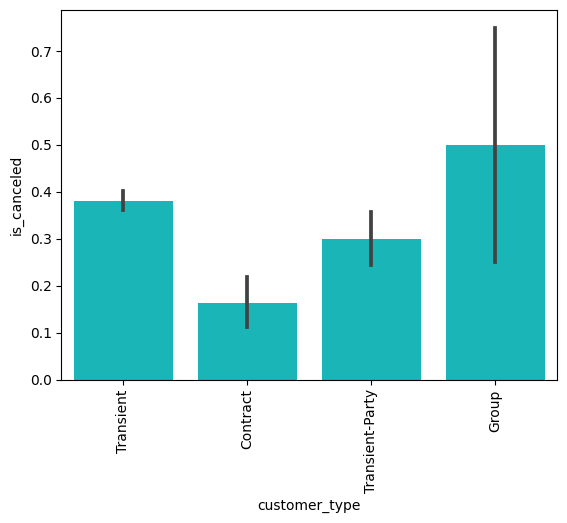

In [18]:
sns.barplot(x='customer_type', y='is_canceled', data=hotel, color="darkturquoise")
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()


## Can be seen based on the customer type, the type of contract type has a very low probability of canceling compared to the others, because usually if based on a contract there are several agreements and clauses that are in the form of money or whatever must be agreed upon by both parties when a cancellation occurs. then most of them, this customer is reasonable if very few cancel the order.

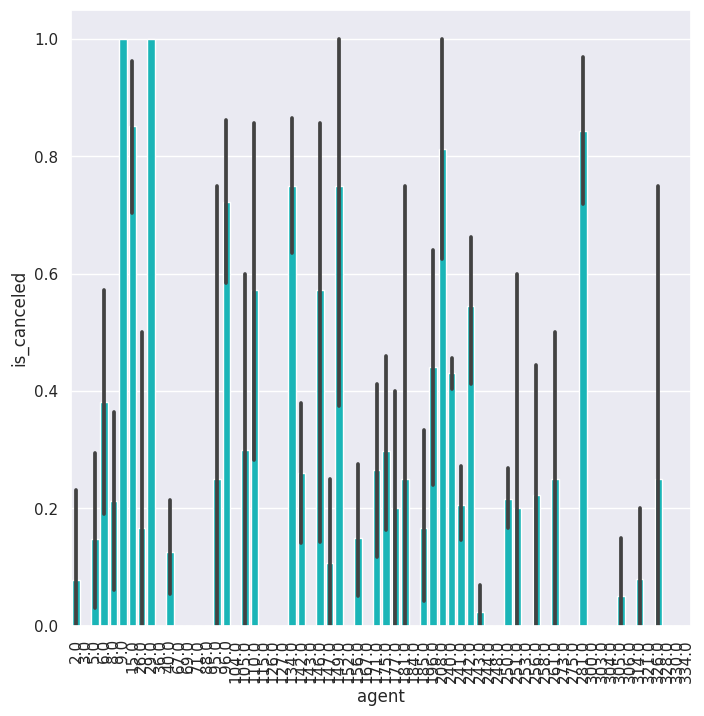

In [19]:
sns.barplot(x='agent', y='is_canceled', data=hotel, color="darkturquoise")
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(20,20)})
plt.show()


# From data agent above can seen there is a few agent that have low cancelation probablity and there that have high, this data is importan for company as consideration in future who agent that need to prioritze and who that is credibility less good, so that we can un prioritize them or we can also give reward to agent that have track record of cancelation probability very good.

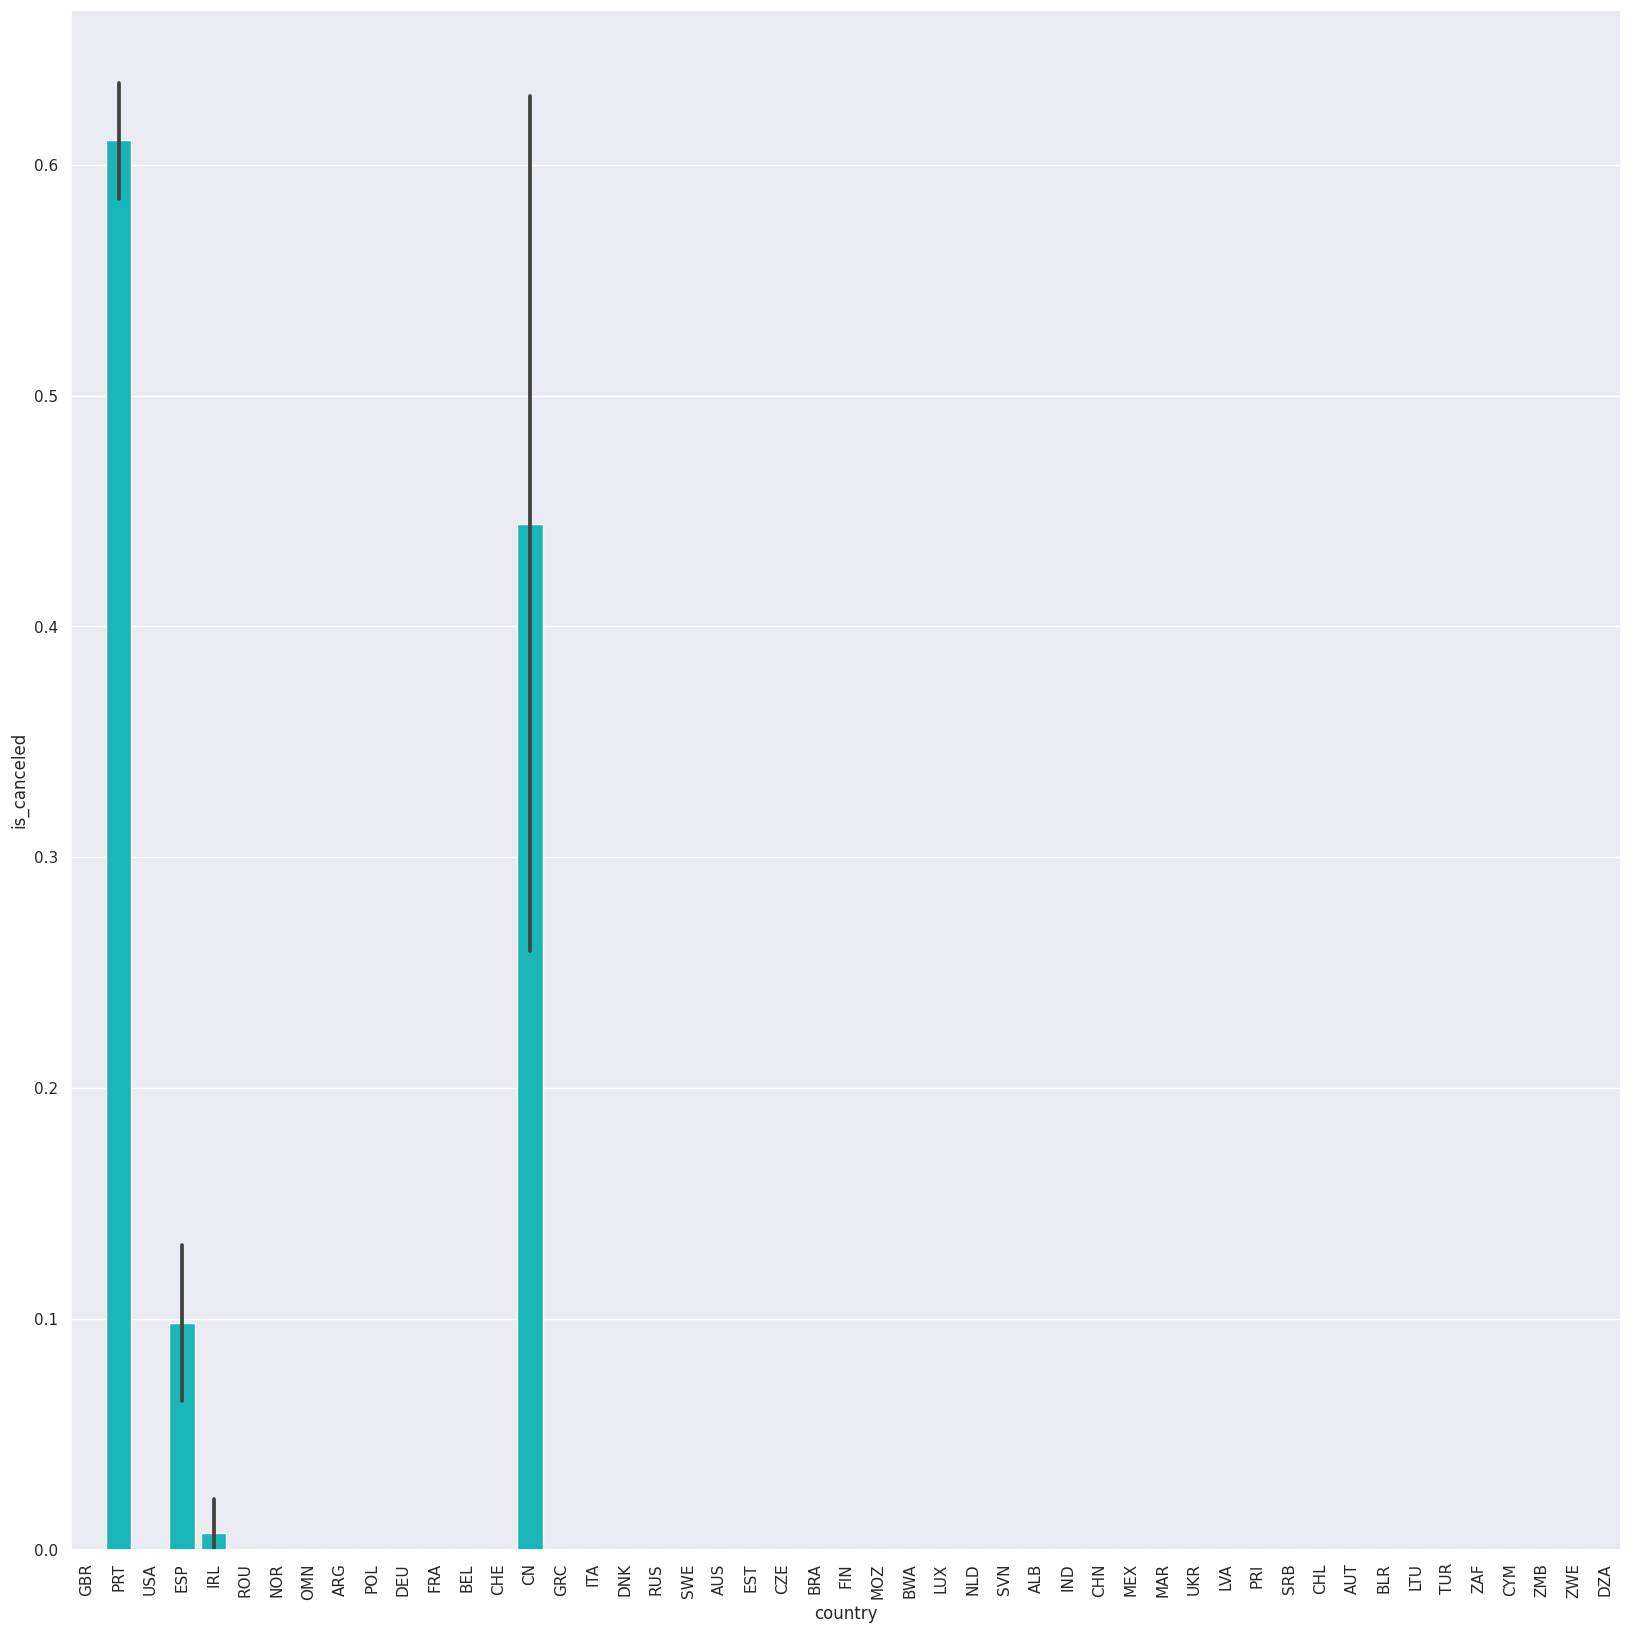

In [20]:
sns.barplot(x='country', y='is_canceled', data=hotel, color="darkturquoise")
sns.set(rc={'figure.figsize':(8,8)})
plt.xticks(rotation=90)
plt.show()


# From data above we can see which country that have high cancellation probability

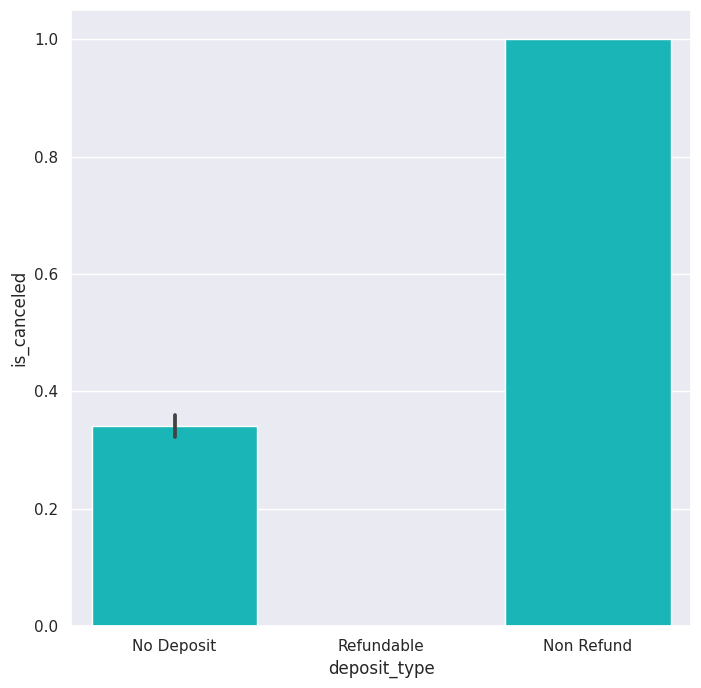

In [21]:
sns.barplot(x='deposit_type', y='is_canceled', data=hotel, color="darkturquoise")
sns.set(rc={'figure.figsize':(7,7)})
plt.show()


# From above can be seen non refund that have higher cancellation probability on description no refund, Non Refud - a deposit was made in the value of total stay cost; If the payment was equal or exceed the total cost of stay, the value is set as "Non Refund".

# So from this case we can take conclusion that not usually customer that have done deposit in early must be probability for not cancel is low, based on data above in the other hand 

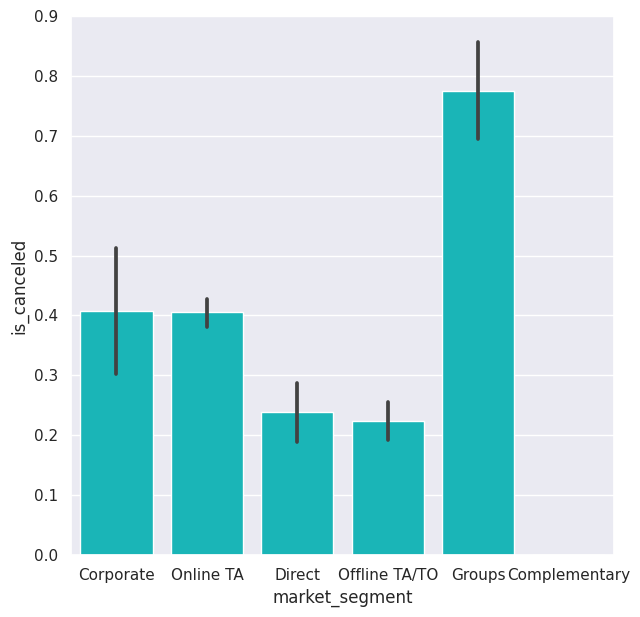

In [22]:
sns.barplot(x='market_segment', y='is_canceled', data=hotel, color="darkturquoise")

plt.show()


# Market segment also can be consideration company where market segment groups give probability cancel that more high compared with another segment, so that order from this segment must be attention and special treatment

## Look outlier

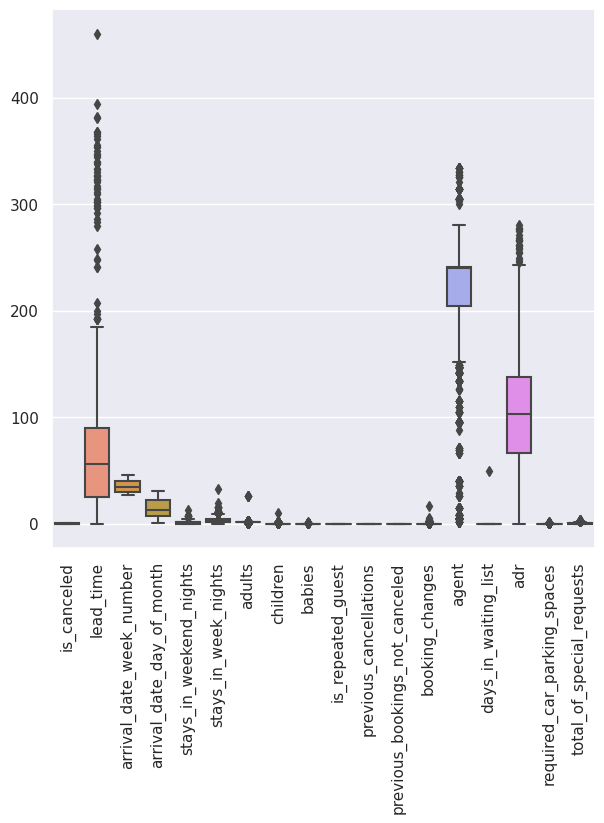

In [23]:
sns.boxplot(data=hotel)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(20,20)})

# There are some outlier data, but the data still makes sense, for example it can be seen by the agent, there are outliers, it makes sense because the agent id numbers can vary and are diffrent, the lead time also makes sense, because that's the time the order first came in and the time it arrived at hotel.

# Next for outlier ADR, ADR is Average Daily Rate with dividing the sum of all lodging transactions by the total number of staying nights, so if ADR value is higher then the better, the outliers here are good outliers I think



# But in making the model later I will maintain the outliers, for the first reason earlier the outliers still make sense, if the accuracy of my model is satisfactory for example above 90 I will continue to use outliers, and the second reason is that my model gets used to having outliers in the future

# Next i will encode for categorical data's, for nominal i using laber encoder

In [24]:
    hotel

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
3,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0
4,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1
5,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1
7,0,9,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1
8,1,85,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,November,46,10,0,5,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,250.0,0,Transient,47.7,0,0
2996,1,39,November,46,10,0,5,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,281.0,0,Transient-Party,40.0,0,0
2997,0,36,November,46,10,0,5,2,1.0,0,BB,ESP,Direct,Direct,0,0,0,A,D,2,No Deposit,250.0,0,Transient,73.2,1,0
2999,0,6,November,46,11,0,1,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,96.0,0,Transient,37.0,1,0


In [25]:
from sklearn.preprocessing import LabelEncoder
hotel['meal_encoded'] = LabelEncoder().fit_transform(hotel['meal'])
hotel['country_encoded'] = LabelEncoder().fit_transform(hotel['country'])
hotel['market_segment_encoded'] = LabelEncoder().fit_transform(hotel['market_segment'])
hotel['distribution_channel_encoded'] = LabelEncoder().fit_transform(hotel['distribution_channel'])
hotel['deposit_type_encoded'] = LabelEncoder().fit_transform(hotel['deposit_type'])
hotel['customer_type_encoded'] = LabelEncoder().fit_transform(hotel['customer_type'])
hotel['reserved_room_type_encoded'] = LabelEncoder().fit_transform(hotel['reserved_room_type'])
hotel['assigned_room_type_encoded'] = LabelEncoder().fit_transform(hotel['assigned_room_type'])

In [26]:
hotel

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,meal_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded,deposit_type_encoded,customer_type_encoded,reserved_room_type_encoded,assigned_room_type_encoded
3,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,0,21,1,0,0,2,0,0
4,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,0,21,5,2,0,2,0,0
5,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,0,21,5,2,0,2,0,0
7,0,9,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,1,37,2,1,0,2,1,2
8,1,85,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,0,37,5,2,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,November,46,10,0,5,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,250.0,0,Transient,47.7,0,0,0,37,2,1,0,2,0,0
2996,1,39,November,46,10,0,5,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,281.0,0,Transient-Party,40.0,0,0,0,37,1,0,0,3,0,0
2997,0,36,November,46,10,0,5,2,1.0,0,BB,ESP,Direct,Direct,0,0,0,A,D,2,No Deposit,250.0,0,Transient,73.2,1,0,0,17,2,1,0,2,0,3
2999,0,6,November,46,11,0,1,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,96.0,0,Transient,37.0,1,0,0,37,4,2,0,2,2,3


In [27]:
#looking unique value from arrival date month

In [28]:
hotel['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November'], dtype=object)

# Then for arrival_date_month i using ordinal encoding

In [29]:
Temp_dict = {'July': 1, 'August': 2, 'September': 3, 'October': 4, 'November': 5}
hotel['arrival_date_month_encode'] = hotel['arrival_date_month'].map(Temp_dict)
hotel

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,meal_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded,deposit_type_encoded,customer_type_encoded,reserved_room_type_encoded,assigned_room_type_encoded,arrival_date_month_encode
3,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,0,21,1,0,0,2,0,0,1
4,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,0,21,5,2,0,2,0,0,1
5,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,0,21,5,2,0,2,0,0,1
7,0,9,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,1,37,2,1,0,2,1,2,1
8,1,85,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,0,37,5,2,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,November,46,10,0,5,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,250.0,0,Transient,47.7,0,0,0,37,2,1,0,2,0,0,5
2996,1,39,November,46,10,0,5,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,281.0,0,Transient-Party,40.0,0,0,0,37,1,0,0,3,0,0,5
2997,0,36,November,46,10,0,5,2,1.0,0,BB,ESP,Direct,Direct,0,0,0,A,D,2,No Deposit,250.0,0,Transient,73.2,1,0,0,17,2,1,0,2,0,3,5
2999,0,6,November,46,11,0,1,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,96.0,0,Transient,37.0,1,0,0,37,4,2,0,2,2,3,5


#then i will remove column that yet encoded

In [30]:
del hotel['arrival_date_month']


In [31]:
del hotel['meal']
del hotel['country']
del hotel['market_segment']
del hotel['distribution_channel']
del hotel['deposit_type']
del hotel['customer_type']
del hotel['reserved_room_type']
del hotel['assigned_room_type']

In [32]:
hotel

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded,deposit_type_encoded,customer_type_encoded,reserved_room_type_encoded,assigned_room_type_encoded,arrival_date_month_encode
3,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0,0,21,1,0,0,2,0,0,1
4,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
5,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
7,0,9,27,1,0,2,2,0.0,0,0,0,0,0,303.0,0,103.0,0,1,1,37,2,1,0,2,1,2,1
8,1,85,27,1,0,3,2,0.0,0,0,0,0,0,240.0,0,82.0,0,1,0,37,5,2,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,46,10,0,5,2,0.0,0,0,0,0,0,250.0,0,47.7,0,0,0,37,2,1,0,2,0,0,5
2996,1,39,46,10,0,5,1,0.0,0,0,0,0,0,281.0,0,40.0,0,0,0,37,1,0,0,3,0,0,5
2997,0,36,46,10,0,5,2,1.0,0,0,0,0,2,250.0,0,73.2,1,0,0,17,2,1,0,2,0,3,5
2999,0,6,46,11,0,1,1,0.0,0,0,0,0,1,96.0,0,37.0,1,0,0,37,4,2,0,2,2,3,5


# Next, I want to see which features have a significant impact on my target

In [33]:
## Features Importance

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
hotel

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded,deposit_type_encoded,customer_type_encoded,reserved_room_type_encoded,assigned_room_type_encoded,arrival_date_month_encode
3,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0,0,21,1,0,0,2,0,0,1
4,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
5,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
7,0,9,27,1,0,2,2,0.0,0,0,0,0,0,303.0,0,103.0,0,1,1,37,2,1,0,2,1,2,1
8,1,85,27,1,0,3,2,0.0,0,0,0,0,0,240.0,0,82.0,0,1,0,37,5,2,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,46,10,0,5,2,0.0,0,0,0,0,0,250.0,0,47.7,0,0,0,37,2,1,0,2,0,0,5
2996,1,39,46,10,0,5,1,0.0,0,0,0,0,0,281.0,0,40.0,0,0,0,37,1,0,0,3,0,0,5
2997,0,36,46,10,0,5,2,1.0,0,0,0,0,2,250.0,0,73.2,1,0,0,17,2,1,0,2,0,3,5
2999,0,6,46,11,0,1,1,0.0,0,0,0,0,1,96.0,0,37.0,1,0,0,37,4,2,0,2,2,3,5


# Divide the data into x, namely the independent variable is a variable that influences or causes a change or emergence of related variables

# While the variable y is the target variable or the dependent variable, namely the variable that gives a reaction or response when associated with the independent variable, usually denoted by Y

In [36]:
X = hotel.iloc[:,1:30]  #independent columns/feature non target
Y = hotel.iloc[:,0:1]    #target column i.e price range

In [37]:
X

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded,deposit_type_encoded,customer_type_encoded,reserved_room_type_encoded,assigned_room_type_encoded,arrival_date_month_encode
3,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0,0,21,1,0,0,2,0,0,1
4,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
5,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
7,9,27,1,0,2,2,0.0,0,0,0,0,0,303.0,0,103.0,0,1,1,37,2,1,0,2,1,2,1
8,85,27,1,0,3,2,0.0,0,0,0,0,0,240.0,0,82.0,0,1,0,37,5,2,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,42,46,10,0,5,2,0.0,0,0,0,0,0,250.0,0,47.7,0,0,0,37,2,1,0,2,0,0,5
2996,39,46,10,0,5,1,0.0,0,0,0,0,0,281.0,0,40.0,0,0,0,37,1,0,0,3,0,0,5
2997,36,46,10,0,5,2,1.0,0,0,0,0,2,250.0,0,73.2,1,0,0,17,2,1,0,2,0,3,5
2999,6,46,11,0,1,1,0.0,0,0,0,0,1,96.0,0,37.0,1,0,0,37,4,2,0,2,2,3,5


In [38]:
Y

,is_canceled
3,0
4,0
5,0
7,0
8,1
...,...
2995,1
2996,1
2997,0
2999,0


# There are 3 ways that I try to use, in looking for important features

/tmp/ipykernel_35/2901659856.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,Y)


[7.53502574e-02 4.60855003e-02 4.47997378e-02 3.44797166e-02
 4.66023402e-02 1.81147108e-02 1.17284957e-02 5.96951671e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.37387985e-02
 3.89623269e-02 1.22055327e-04 6.21396468e-02 7.54959377e-02
 3.16607804e-02 1.99015948e-02 2.65724232e-01 2.98424627e-02
 1.23176378e-02 3.33905434e-02 2.12726965e-02 2.98329917e-02
 4.37987930e-02 2.86692269e-02]


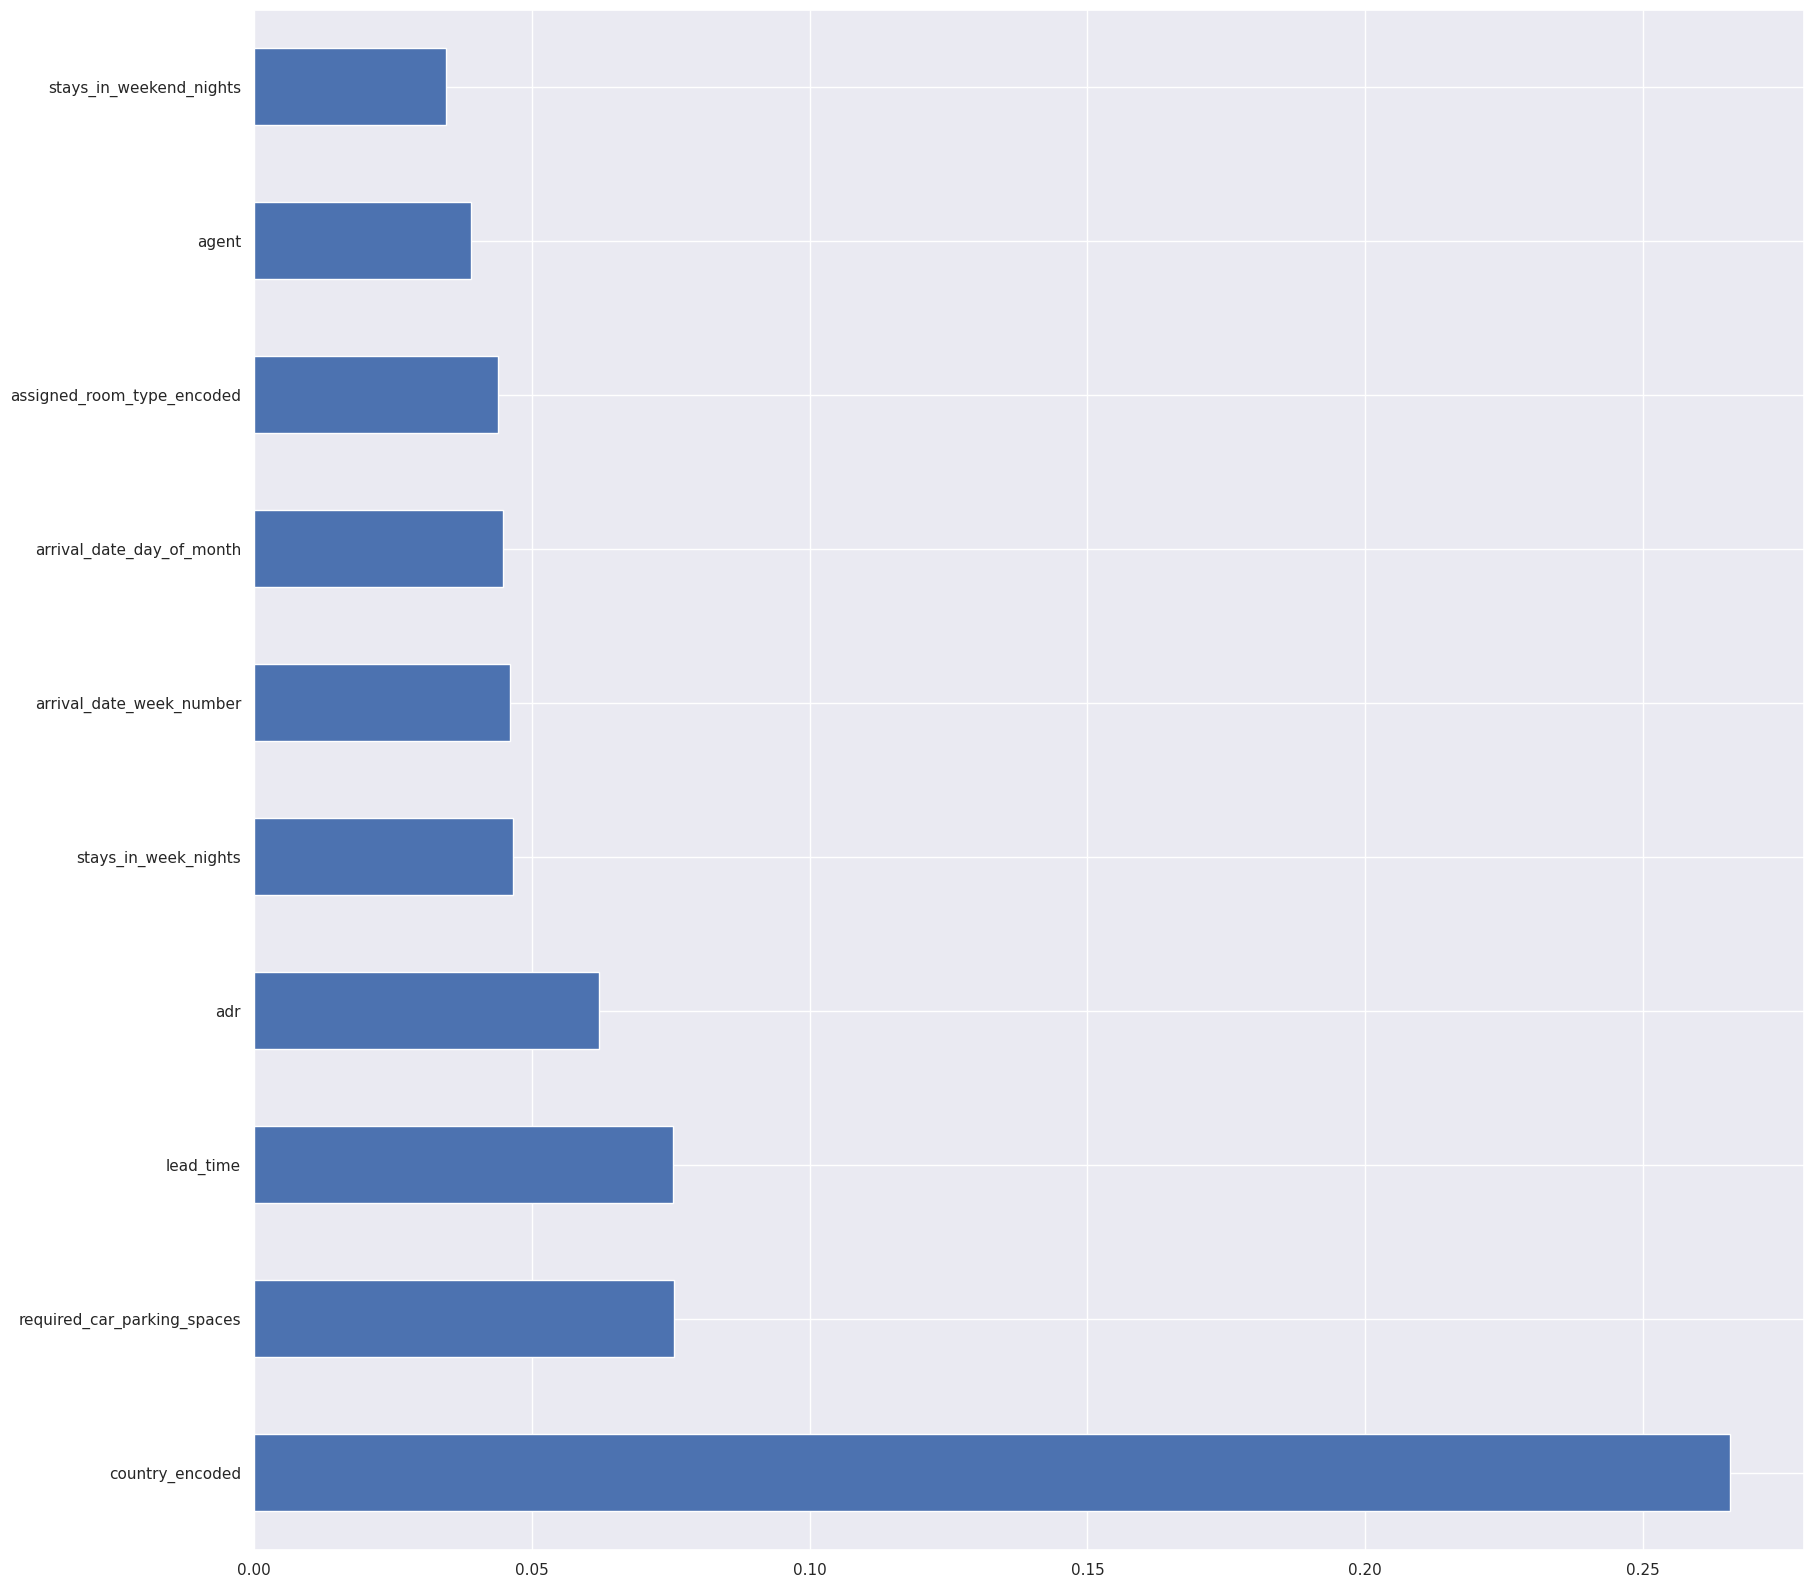

In [39]:
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [40]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                          Specs        Score
0                     lead_time  3990.147014
18              country_encoded  1787.356931
14                          adr  1357.613616
15  required_car_parking_spaces   182.311656
24   assigned_room_type_encoded   125.490295
21         deposit_type_encoded   107.809190
11              booking_changes    67.470708
12                        agent    46.012388
13         days_in_waiting_list    27.791411
2     arrival_date_day_of_month    15.958152


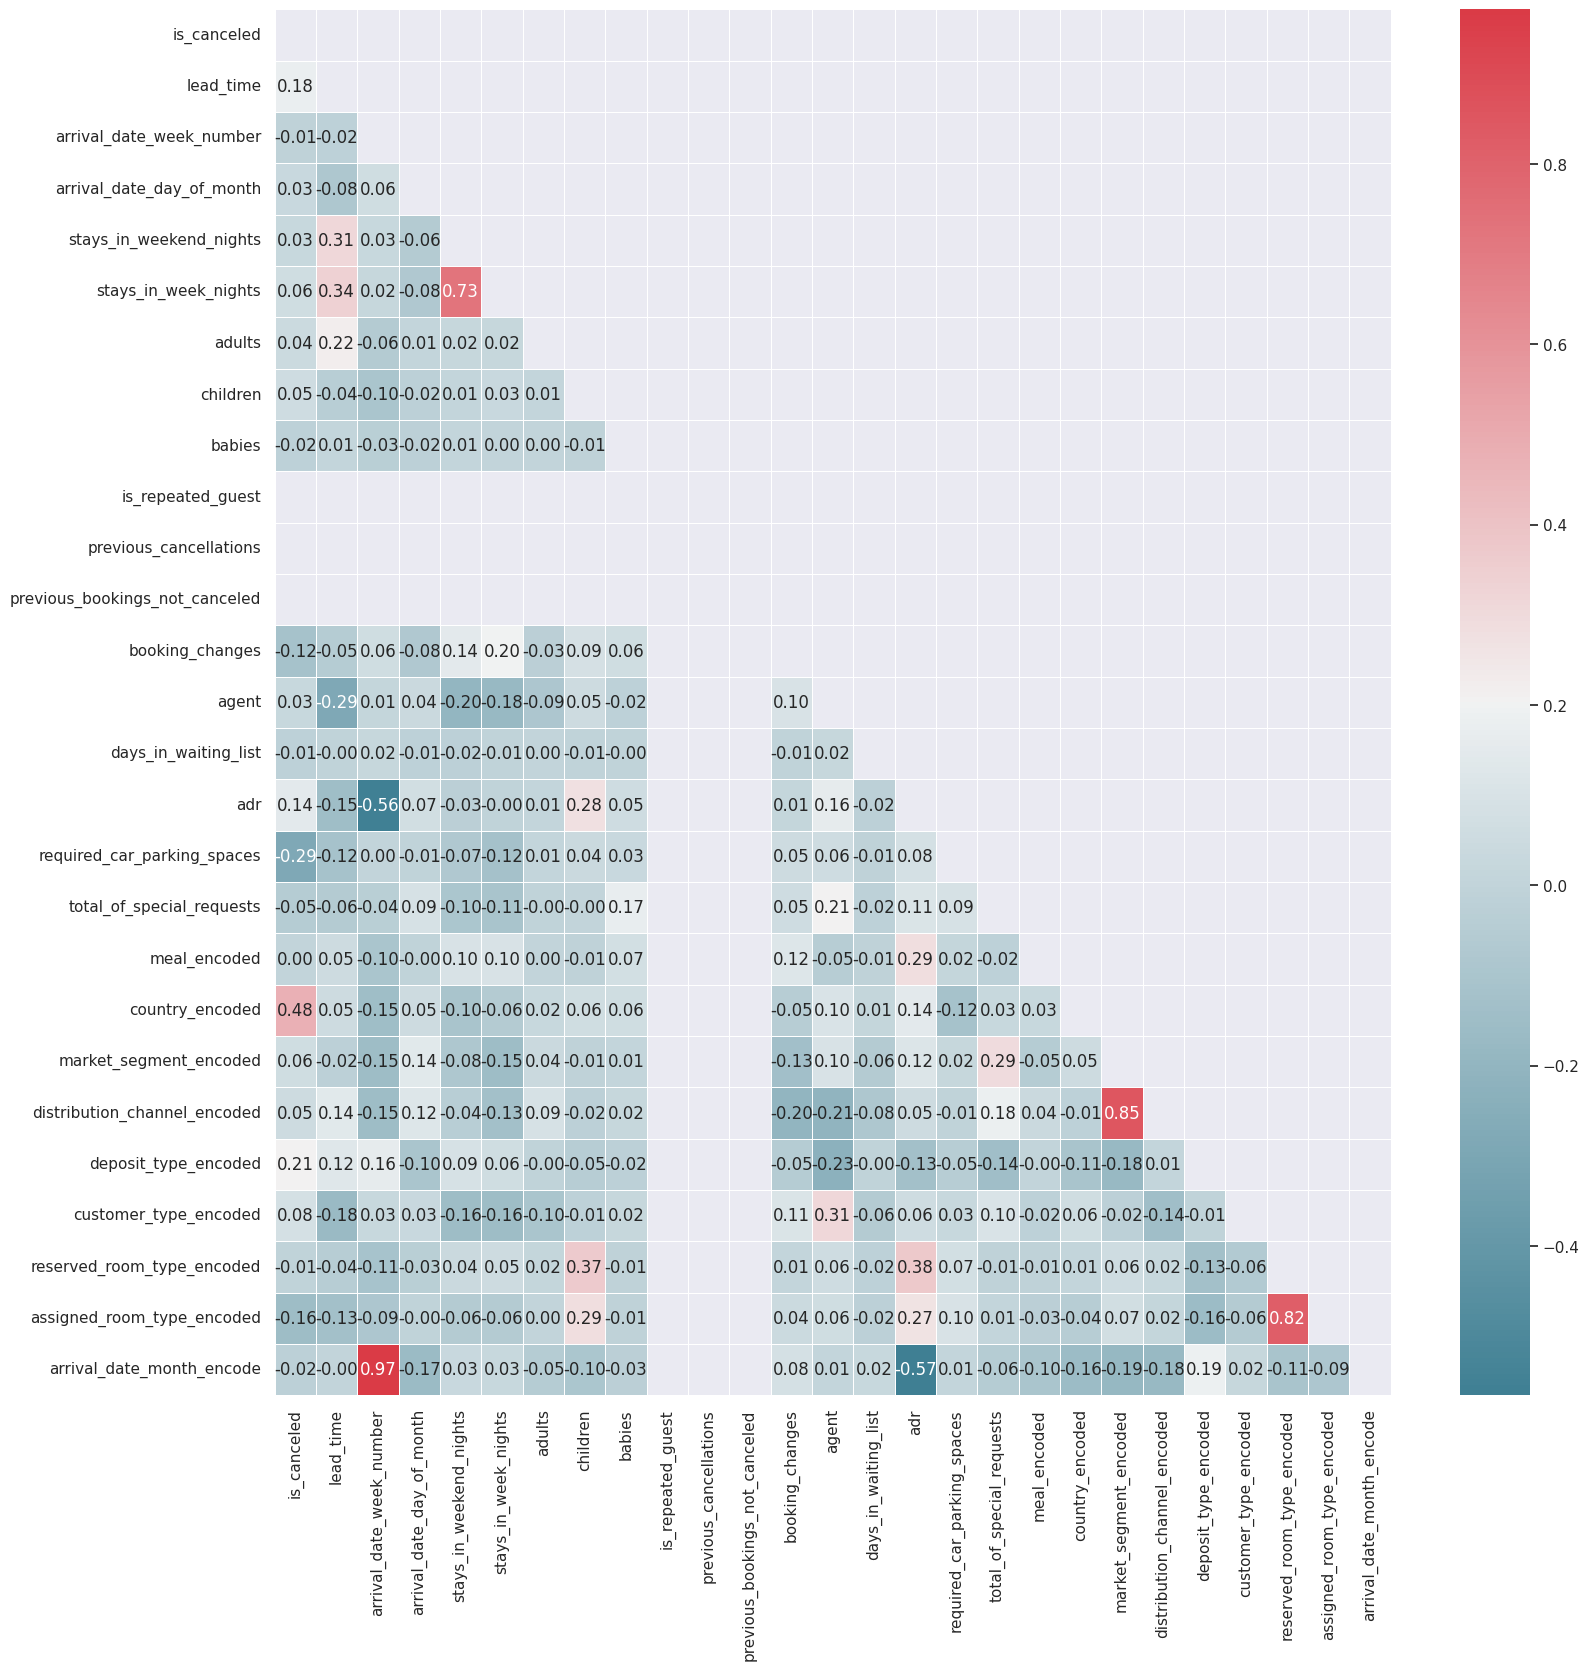

In [41]:
corr = hotel.corr()
fig, ax = plt.subplots(figsize=(18, 18))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

# I will try two experiments, with all the columns and using the top 10 columns from the feature selection, I will use the top 10 from the Kbest and Extratree classifier, because from several papers these 2 tools are most often used as a benchmark, and we can see the results of both same top 10

# The first experiment, I used a random forest, I prefer to use a random forest because based on my several opportunities in modeling exercises and from several papers, the random forest has a fairly high level of model accuracy compared to logistic regression or decision trees, because the random foreest is a collection of many trees can be said to be a forest or a collection of decision trees, random forest continues to iterate from each of the best trees so it's no wonder the results are better, using all the features

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### **Spliting Dataset**

In [43]:
hotel

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_encoded,country_encoded,market_segment_encoded,distribution_channel_encoded,deposit_type_encoded,customer_type_encoded,reserved_room_type_encoded,assigned_room_type_encoded,arrival_date_month_encode
3,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0,0,21,1,0,0,2,0,0,1
4,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
5,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,0,21,5,2,0,2,0,0,1
7,0,9,27,1,0,2,2,0.0,0,0,0,0,0,303.0,0,103.0,0,1,1,37,2,1,0,2,1,2,1
8,1,85,27,1,0,3,2,0.0,0,0,0,0,0,240.0,0,82.0,0,1,0,37,5,2,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,42,46,10,0,5,2,0.0,0,0,0,0,0,250.0,0,47.7,0,0,0,37,2,1,0,2,0,0,5
2996,1,39,46,10,0,5,1,0.0,0,0,0,0,0,281.0,0,40.0,0,0,0,37,1,0,0,3,0,0,5
2997,0,36,46,10,0,5,2,1.0,0,0,0,0,2,250.0,0,73.2,1,0,0,17,2,1,0,2,0,3,5
2999,0,6,46,11,0,1,1,0.0,0,0,0,0,1,96.0,0,37.0,1,0,0,37,4,2,0,2,2,3,5


In [44]:
x = hotel.drop(['is_canceled'], axis = 1)
y = hotel['is_canceled']

In [45]:
y

3       0
4       0
5       0
7       0
8       1
       ..
2995    1
2996    1
2997    0
2999    0
3000    1
Name: is_canceled, Length: 2536, dtype: int64

# I divide the data set into 2 parts, namely training and test, the proportions are 90 percent and 10 percent, so that the model learns more

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=0)

In [47]:
model = RandomForestClassifier(n_estimators = 2000, min_samples_split= 2, min_samples_leaf = 1, max_depth = 25)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=2000)

In [48]:
# prediksi
y_pred = model.predict(x_test) 

In [49]:
# trying to predict using model
coba = x_test.iloc[:1]
model.predict(coba)
# coba

array([1])

### **Evaluating Model**

In [50]:
confusion_matrix(y_test, y_pred) 

array([[141,  12],
       [ 10,  91]])

In [51]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       153
           1       0.88      0.90      0.89       101

    accuracy                           0.91       254
   macro avg       0.91      0.91      0.91       254
weighted avg       0.91      0.91      0.91       254



In [52]:
model.score(x_train, y_train)

0.9986853637160386

In [53]:
model.score(x_test, y_test)

0.9133858267716536

In [54]:
accuracies = {}
acc = model.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 91.34%


# I think 90 percent is good, but to make the model even better, let's try using hyperparameters

In [55]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [56]:
param_dist = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [57]:
# tree = RandomForestClassifier()
# tree_cv = RandomizedSearchCV(tree,param_dist,cv=30)

In [58]:
# tree_cv.fit(x_train,y_train)

In [59]:
# print('Tuned Decision Tree Parameters:{}'.format(tree_cv.best_params_))
# print('Best score is {}'.format(tree_cv.best_score_))

# try again with new parameters

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=0)

In [61]:
model = RandomForestClassifier(n_estimators = 1400, min_samples_split= 10, min_samples_leaf = 1, max_depth = None)
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=1400)

In [62]:
# prediksi
y_pred = model.predict(x_test) 

### **Evaluating Model**

In [63]:
confusion_matrix(y_test, y_pred) 

array([[141,  12],
       [ 10,  91]])

In [64]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       153
           1       0.88      0.90      0.89       101

    accuracy                           0.91       254
   macro avg       0.91      0.91      0.91       254
weighted avg       0.91      0.91      0.91       254



In [65]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9680105170902716
0.9133858267716536


In [66]:
accuracies = {}
acc = model.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 91.34%


# Our random forest model has very good results, and our data is not over-fitting. It can be seen from the results of the training and tests that the results do not show too significant a difference. If our data is over-fitting, it can cause the results to drop in the test. make another model.

## experiment 2: using a random forest and using only the top 10 features

 lead_time  
             country_encoded  
                         adr  
  required_car_parking_spaces   
  assigned_room_type_encoded   
         deposit_type_encoded   
              booking_changes    
                      agent   
         days_in_waiting_list   
arrival_date_day_of_month    

In [67]:
x = hotel[['lead_time','country_encoded','adr','required_car_parking_spaces','assigned_room_type_encoded','deposit_type_encoded'
          ,'booking_changes','agent','days_in_waiting_list','arrival_date_day_of_month']]
y = hotel['is_canceled']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=0)

In [69]:
model = RandomForestClassifier(n_estimators = 1400, min_samples_split= 10, min_samples_leaf = 1, max_depth = None)
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=1400)

In [70]:
# prediksi
y_pred = model.predict(x_test) 

In [71]:
# trying to predict using model
coba = x_test.iloc[:1]
model.predict(coba)
# coba

array([1])

### **Evaluating Model**

In [72]:
confusion_matrix(y_test, y_pred) 

array([[134,  19],
       [  7,  94]])

In [73]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       153
           1       0.83      0.93      0.88       101

    accuracy                           0.90       254
   macro avg       0.89      0.90      0.90       254
weighted avg       0.90      0.90      0.90       254



In [74]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9588080631025416
0.8976377952755905


In [75]:
accuracies = {}
acc = model.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 89.76%


# using decision tree and all features

In [76]:
x = hotel.drop(['is_canceled'], axis = 1)
y = hotel['is_canceled']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=False)

In [78]:
param_dist = {'max_depth' : [3,32,None],
             'min_samples_leaf': randint(1,9),
             'criterion':['gini','entropy']}

In [79]:
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree,param_dist,cv=10)
#set cv ada berapa
tree_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 32, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7d0af323f9a0>})

In [80]:
print('Tuned Decision Tree Parameters:{}'.format(tree_cv.best_params_))
print('Best score is {}'.format(tree_cv.best_score_))

Tuned Decision Tree Parameters:{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7}
Best score is 0.8230483413774612


In [81]:
tree = DecisionTreeClassifier(criterion = "gini",max_depth=3, min_samples_leaf=6)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [82]:
y_pred = tree.predict(x_test)

In [83]:
confusion_matrix(y_test, y_pred)

array([[153,  24],
       [  5,  72]])

In [84]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       177
           1       0.75      0.94      0.83        77

    accuracy                           0.89       254
   macro avg       0.86      0.90      0.87       254
weighted avg       0.90      0.89      0.89       254



In [85]:
tree.score(x_train, y_train)

0.8453111305872042

In [86]:
tree.score(x_test, y_test)

0.8858267716535433

# using a top 10 feature decision tree

In [87]:
x = hotel[['lead_time','country_encoded','adr','required_car_parking_spaces','assigned_room_type_encoded','deposit_type_encoded'
          ,'booking_changes','agent','days_in_waiting_list','arrival_date_day_of_month']]
y = hotel['is_canceled']

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=False)

In [89]:
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree,param_dist,cv=10)
#set cv ada berapa
tree_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 32, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7d0af323f9a0>})

In [90]:
print('Tuned Decision Tree Parameters:{}'.format(tree_cv.best_params_))
print('Best score is {}'.format(tree_cv.best_score_))

Tuned Decision Tree Parameters:{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8}
Best score is 0.8400789090630507


In [91]:
tree = DecisionTreeClassifier(criterion = "gini",max_depth=3, min_samples_leaf=4)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)

In [92]:
y_pred = tree.predict(x_test)

In [93]:
confusion_matrix(y_test, y_pred)

array([[153,  24],
       [  5,  72]])

In [94]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       177
           1       0.75      0.94      0.83        77

    accuracy                           0.89       254
   macro avg       0.86      0.90      0.87       254
weighted avg       0.90      0.89      0.89       254



In [95]:
tree.score(x_train, y_train)

0.8453111305872042

In [96]:
tree.score(x_test, y_test)

0.8858267716535433

In [97]:
# menggunakan logistic

# There are 2 types of errors that may occur in the ML model in this case study, namely:

# 1. The model predicts the user will cancel the order, even though in fact the user has not canceled the order.

# 2. The model predicts that the user will not cancel the order, even though in fact the user canceled the order.

# I think the type of error that has the most effect on the company is point 2, because by predicting the user will not cancel the order, even though the user actually canceled the order, the room we should have known earlier will cancel the order, we can transfer or sell it to another customer, but in fact, we are still taking care of the cutomer, who should have canceled the booking, as a result, it is approaching the D-day, the customer's room that we predicted was wrong, it doesn't cancel, when the room is canceled, we will be confused about offering the room to another customer because time is running out and it can cause the room to be empty on the D day so that the company's revenue in that room on that day decreases

# therefore to suppress this error that's why we have to look for a model that has the largest recall of 0, meaning that the model can guess which person doesn't want to cancel compared to the one who actually canceled, we have to look for a model that has a high recall of 0 (not cancelled)

In [98]:
import pandas as pd
import numpy as np
data = {"Condition": ['Random forest semua fitur', 'Random forest 10 fitur teratas', 'Decision tree semua fitur','Decison tree 10 fitur teratas'],
       'Recall 0(tidak cancel)': [92,88,86,86],}
df = pd.DataFrame(data)
df

,Condition,Recall 0(tidak cancel)
0,Random forest semua fitur,92
1,Random forest 10 fitur teratas,88
2,Decision tree semua fitur,86
3,Decison tree 10 fitur teratas,86


<Figure size 500x500 with 0 Axes>

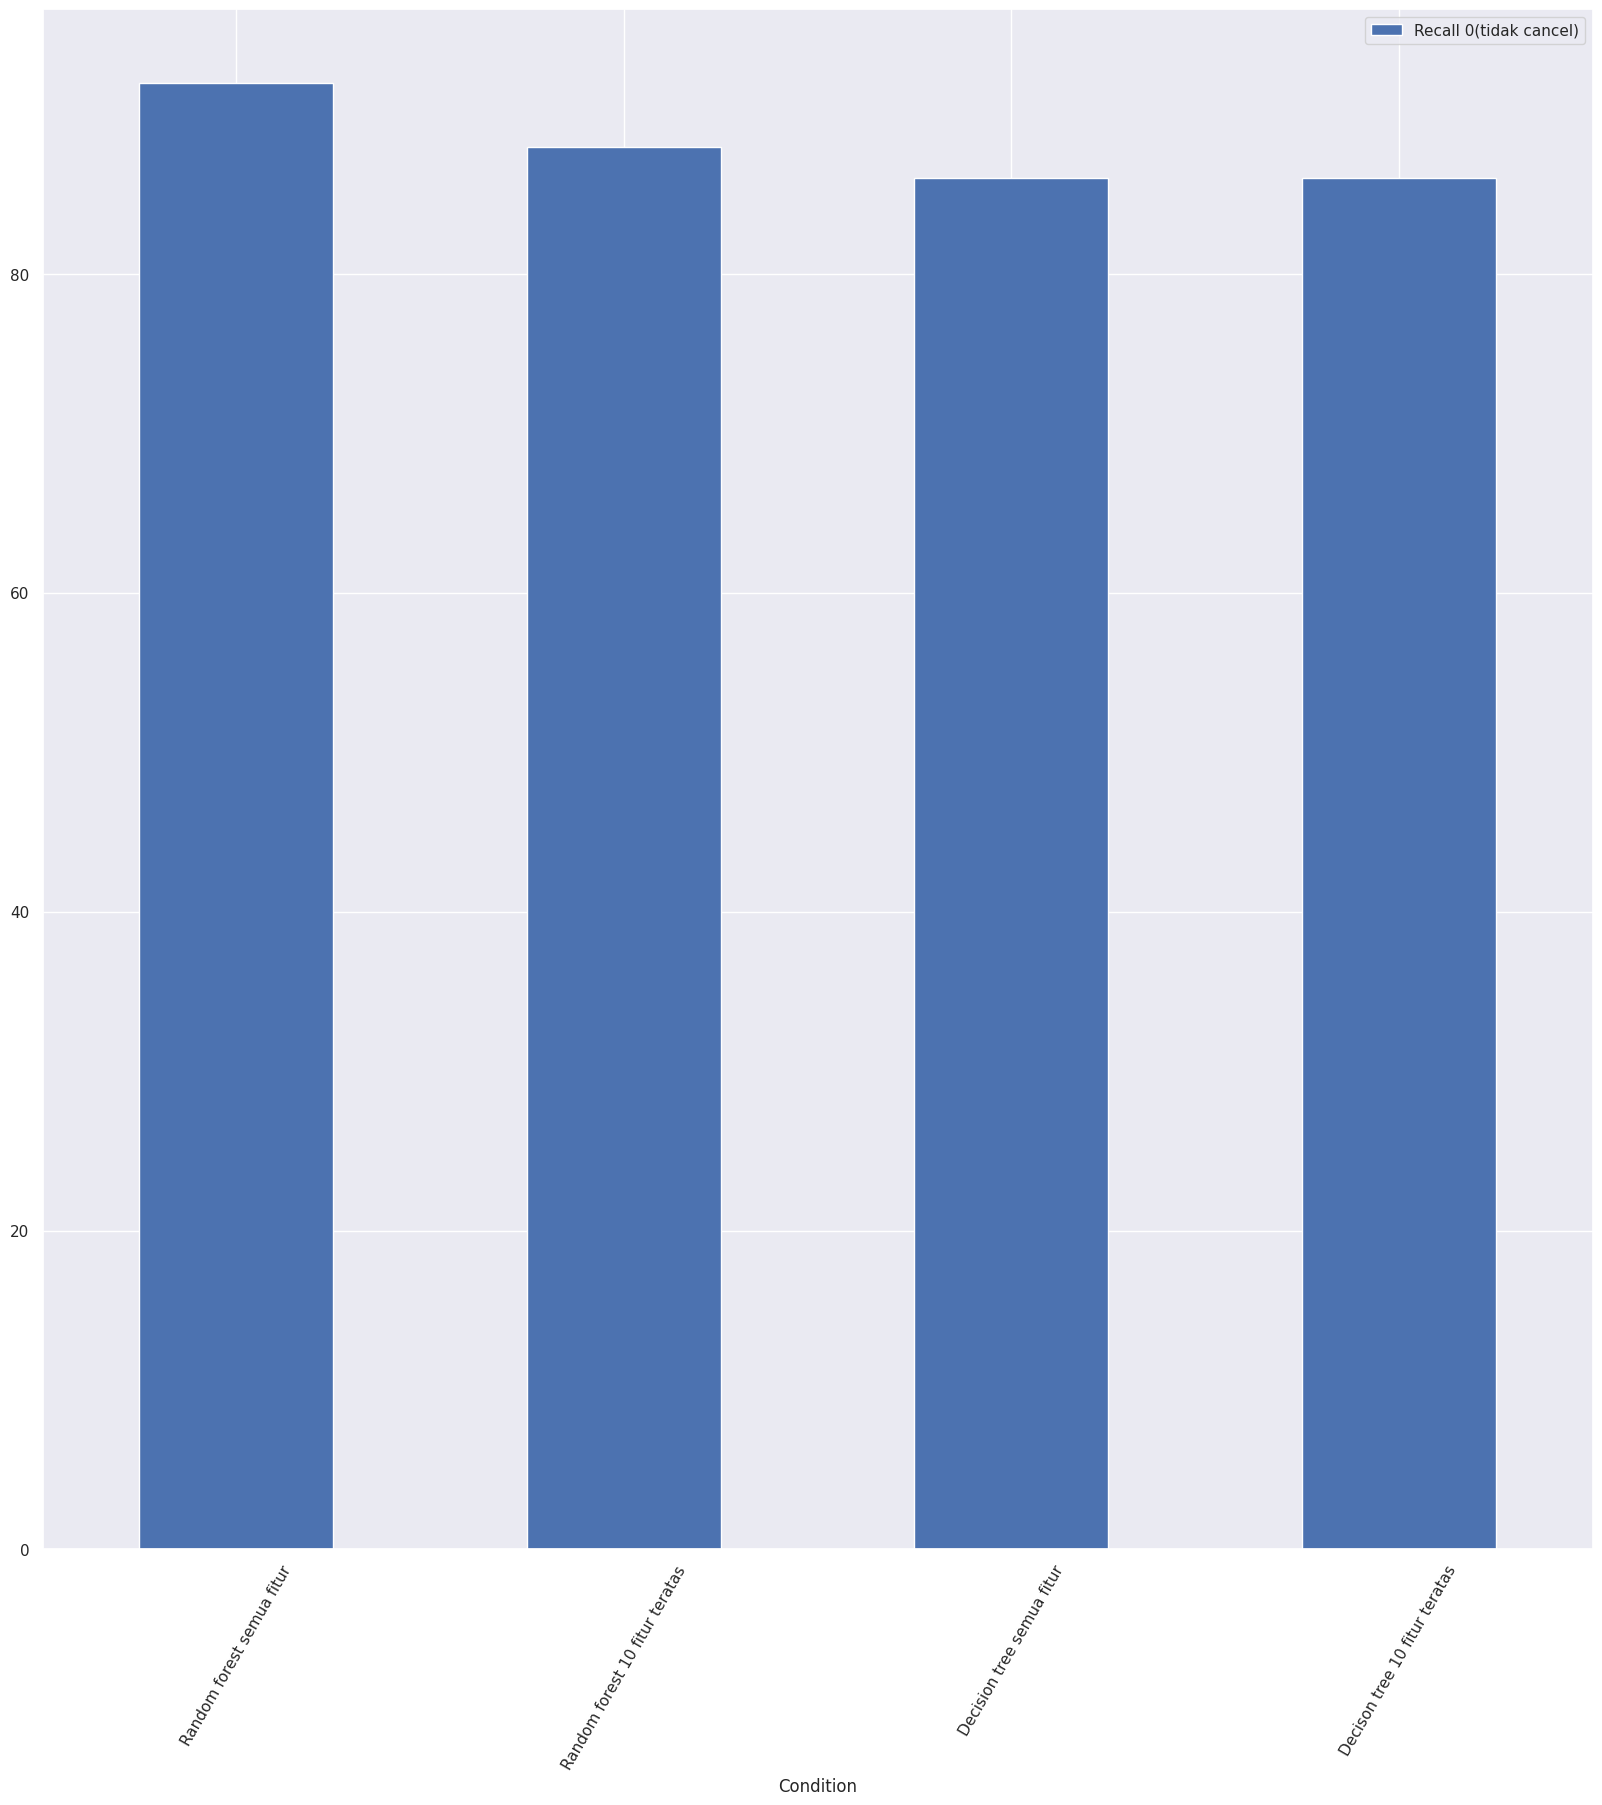

In [99]:
plt.figure(figsize=(5,5))
df.plot(x="Condition", y=["Recall 0(tidak cancel)"], kind="bar")
plt.xticks(rotation=60)
plt.show()

# From the data above, it can be concluded that the model with the best and highest 0 recall is the model using the random forest model, and uses all the features and has used hyperparameter tuning, which is equal to:

# recall 0: 92 percent

# So the accuracy of our model for predictions of people who don't cancel compared to those who don't actually cancel is 92 percent.

# There are several ways for me to maximize the model in the future, namely multiplying the data, then you can also use other tools besides random forest and decision trees, so we can compare the results and we can choose the best model.

# That's all my project about the hotel booking cancellation dataset, I hope this model can help companies to maximize their services in the future, thank you